### Book Recommender

## Imports

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances

In [3]:
print('Load Time: Approx. 6 minutes...')
print('\n')

Load Time: Approx. 6 minutes...




## Data Manipulation - Pandas

In [4]:
# import 0-5000 user data
df_5000 = pd.read_csv('first_book_data')

In [5]:
df_5000.tail()

,Unnamed: 0,Book,Rating,User
92311,92311,Transparent Things,2,5000
92312,92312,"King, Queen, Knave",3,5000
92313,92313,Bend Sinister,2,5000
92314,92314,Lolita,3,5000
92315,92315,"Speak, Memory",3,5000


In [6]:
# import 5000-10000 user data
df_10000 = pd.read_csv('second_book_data')

In [7]:
df_10000.tail()

,Unnamed: 0,Book,Rating,User
87503,87503,خوبیِ خدا,2,9997
87504,87504,The Master and Margarita,4,10000
87505,87505,Suvashun,5,10000
87506,87506,The World of the Sufi: An Anthology of Writing...,3,10000
87507,87507,As I Lay Dying,4,10000


In [8]:
# import 10000-15000 user data
df_15000 = pd.read_csv('third_book_data')

In [9]:
df_15000.tail()

,Unnamed: 0,Book,Rating,User
74851,74851,As I Lay Dying,4,14997
74852,74852,Light in August,4,14997
74853,74853,"Absalom, Absalom!",5,14997
74854,74854,Wild Palms,5,14997
74855,74855,The Sound and the Fury,5,14997


In [10]:
# import 15000-20000 user data
df_20000 = pd.read_csv('fourth_book_data')

In [11]:
df_20000.tail()

,Unnamed: 0,Book,Rating,User
89108,89108,Study Bible: NIV,5,20000
89109,89109,"The Good Earth (House of Earth, #1)",4,20000
89110,89110,Memorias de una geisha,4,20000
89111,89111,"Angela's Ashes (Frank McCourt, #1)",4,20000
89112,89112,Mere Christianity,4,20000


In [12]:
# import 20000-25000 user data
df_25000 = pd.read_csv('fifth_book_data')

In [13]:
df_25000.tail()

,Unnamed: 0,Book,Rating,User
77644,77644,"The Feynman Lectures on Physics, 3 Vols",5,25000
77645,77645,Linear Algebra and Its Applications,5,25000
77646,77646,Physics (2 Vol. Set),3,25000
77647,77647,Lost New York,5,25000
77648,77648,Nightmare Town: Stories,3,25000


In [14]:
# create a list of our data so we can concat them
frames = [df_5000, df_10000, df_15000, df_20000, df_25000]

In [15]:
# concat all the dataframes to create a single one
complete_set = pd.concat(frames)

In [16]:
# drop unwanted columns
complete_set.drop(columns='Unnamed: 0', inplace=True)

In [17]:
# save the data as csv file
complete_set.to_csv('complete_book_data.csv')

In [18]:
# import complete book data csv file
df = pd.read_csv('complete_book_data.csv')

In [19]:
# drop unwanted columns
df.drop(columns='Unnamed: 0', inplace=True)

In [20]:
df.head()

,Book,Rating,User
0,"Toujours Provence (Provence, #2)",4,1
1,"A Year in Provence (Provence, #1)",5,1
2,The Mamba Mentality: How I Play,4,1
3,"The Story of Doctor Dolittle (Doctor Dolittle,...",5,1
4,2018 on Goodreads,4,1


In [21]:
df.tail()

,Book,Rating,User
421437,"The Feynman Lectures on Physics, 3 Vols",5,25000
421438,Linear Algebra and Its Applications,5,25000
421439,Physics (2 Vol. Set),3,25000
421440,Lost New York,5,25000
421441,Nightmare Town: Stories,3,25000


## Statistics

In [22]:
print('Statistics:')
# get number of unique users
print(f"- There are a total of {str(df['User'].nunique())[:1]},{str(df['User'].nunique())[1:]} users")
# get number of unique books
print(f"- There are a total of {str(df['Book'].nunique())[:2]},{str(df['Book'].nunique())[2:]} unique books")
# get the length of the entire dataset
print(f"- There are a total of {str(len(df))[:3]},{str(len(df))[3:]} ratings")
print('\n')

Statistics:
- There are a total of 8,781 users
- There are a total of 98,759 unique books
- There are a total of 421,442 ratings




## Data Visualization

### 20 Most Rated Books

In [58]:
# count amount of times book has been rated and return top 20
top_20_most_rated = df['Book'].value_counts()[:20]
top_20_most_rated

The Catcher in the Rye                                          1647
The Great Gatsby                                                1530
The Da Vinci Code (Robert Langdon, #2)                          1498
The Kite Runner                                                 1412
To Kill a Mockingbird                                           1297
1984                                                            1203
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)        1197
Animal Farm                                                     1196
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)     1178
Harry Potter and the Goblet of Fire (Harry Potter, #4)          1086
Harry Potter and the Order of the Phoenix (Harry Potter, #5)    1008
Harry Potter and the Half-Blood Prince (Harry Potter, #6)       1003
Pride and Prejudice                                              997
The Alchemist                                                    975
One Hundred Years of Solitude     

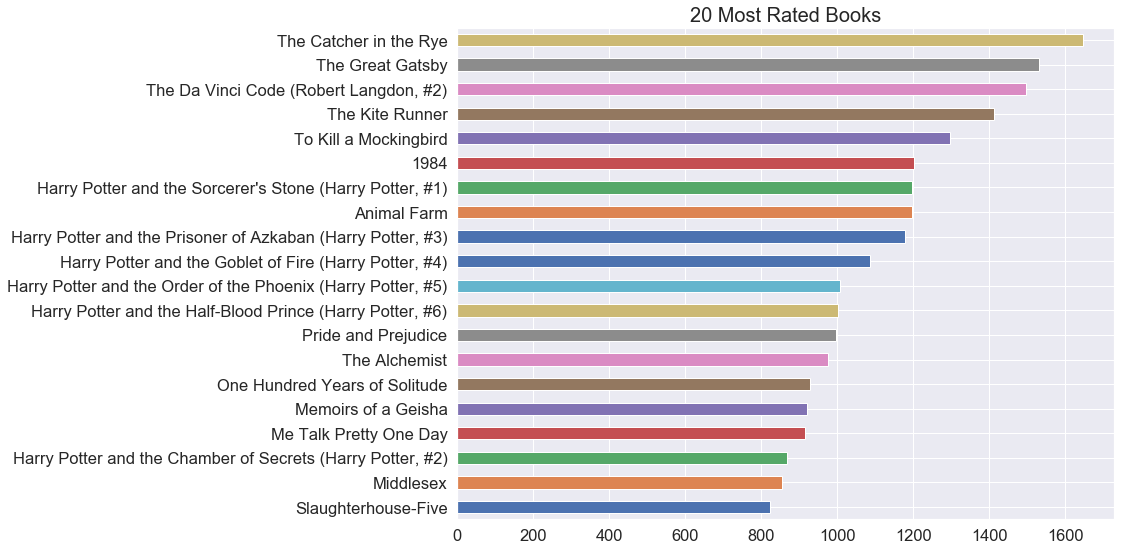

In [175]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
top_20_most_rated_plt = top_20_most_rated.head(20)[::-1].plot(kind='barh').set_title('20 Most Rated Books', size=20)
plt.tight_layout()
# plt.savefig("top_20_most_rated_plt.png")

### 20 Most Rated Books Ranked

In [34]:
def top_20_highest_rated():
    # import complete book csv file
    top_20_highest_rated_df = pd.read_csv('complete_book_data.csv')
    # make the index equal to the book titles
    top_20_highest_rated_df.index = top_20_highest_rated_df['Book']
    # drop unwanted columns
    top_20_highest_rated_df.drop(columns='Book', inplace=True)
    
    top_20_highest_rated = []
    # for each book in the top 20 most rated books
    for book in df['Book'].value_counts()[:20].index:
        # append rating for the top 20 most rated books as a tuple
        top_20_highest_rated.append((book, round(top_20_highest_rated_df.loc[book, :].mean(),2)['Rating']))

    # sort the list of tuples by the rating and reverse the order
    top_20_highest_rated.sort(key=lambda tup: tup[1], reverse=True)
    # save this data as a DataFrame with columns as book and average rating
    top_20_highest_rated = pd.DataFrame(top_20_highest_rated, columns=['Book', 'Average Rating'])
    # make the index equal to book tiltes
    top_20_highest_rated.index = top_20_highest_rated['Book']
    # drop unwanted columns
    top_20_highest_rated.drop(columns='Book', inplace=True)
    # turn the DataFrame into Series format
    top_20_highest_rated = top_20_highest_rated.iloc[:,0]
    return top_20_highest_rated

In [32]:
top_20_highest_rated()

Book
To Kill a Mockingbird                                           4.29
The Kite Runner                                                 4.19
Harry Potter and the Half-Blood Prince (Harry Potter, #6)       4.19
Pride and Prejudice                                             4.18
Slaughterhouse-Five                                             4.17
Harry Potter and the Goblet of Fire (Harry Potter, #4)          4.16
1984                                                            4.15
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)     4.15
One Hundred Years of Solitude                                   4.15
Middlesex                                                       4.13
The Catcher in the Rye                                          4.04
Harry Potter and the Order of the Phoenix (Harry Potter, #5)    4.04
Me Talk Pretty One Day                                          4.01
The Great Gatsby                                                3.98
Harry Potter and the Sorcerer

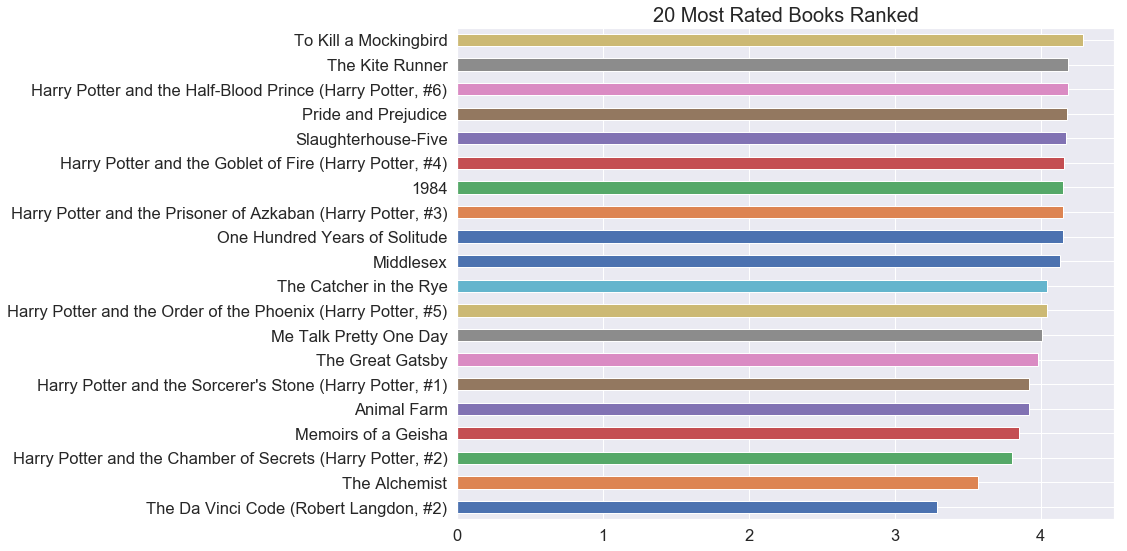

In [174]:
sns.set_style('darkgrid')
sns.set(font_scale=1.5) 
plt.figure(figsize=(16,8))
top_20_highest_rated_plt = top_20_highest_rated()[::-1].plot(kind='barh').set_title('20 Most Rated Books Ranked', size=20)
plt.ylabel('')
plt.tight_layout()
# plt.savefig("top_20_highest_rated_plt.png")

## Item-Item Collaberative Recommender System
> Recommendations based on books with similar ratings

In [166]:
print('Item Recommender Imports:')

Item Recommender Imports:


### Pivot Table

In [23]:
# pivot our data so the index are book titles, columns are users, and values are the ratings
book_pivot_table = pd.pivot_table(df, index='Book', columns='User', values='Rating')

In [24]:
book_pivot_table.head()

User,1,2,3,4,5,6,7,8,9,12,...,24973,24980,24982,24983,24984,24989,24991,24993,24997,25000
Book,,,,,,,,,,,,,,,,,,,,,
"!Viva Tequila!: Cocktails, Cooking, and Other Agave Adventures",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!از قر و قمبیل‌های قلمی بی‌قال و قیل,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""A Problem from Hell"": America and the Age of Genocide",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""A Woman's Place Is in the Kitchen"": The Evolution of Women Chefs",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""A"" Is for American: Letters and Other Characters in the Newly United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print('- Item pivot table complete...')

- Item pivot table complete...


### Sparse Matrix

In [26]:
# create a sparse_matrix from our pivot table and fill the NaN values with 0 which will get ignored
# book_sparse_pivot = sparse.csr_matrix(book_pivot_table.fillna(0))

In [27]:
# sparse.save_npz('book_sparse_pivot.npz', book_sparse_pivot)

In [28]:
# load sparse_pivot_table file 
book_sparse_pivot = sparse.load_npz('book_sparse_pivot.npz')

In [29]:
print('- Item sparse matrix loaded...')

- Item sparse matrix loaded...


### Cosine Calculations
#### Load Time: Approx. 4-5 minutes

In [30]:
# user pairwise_distance to calculate cosine similarity on the sparse_pivot data
book_recommender = pairwise_distances(book_sparse_pivot, metric='cosine')

In [31]:
# np.save('book_recommender.npy', book_recommender)

In [32]:
# load up the cosine similarity array file
# book_recommender = np.load('book_recommender.npy')

In [33]:
book_recommender

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [34]:
print('- Item Cosine calculations complete...')

- Item Cosine calculations loaded...


### Recommender DataFrame

In [35]:
# insert the cosine similary array into a DataFrame with book titles as the index and columns 
book_recommender_df = pd.DataFrame(book_recommender, index=book_pivot_table.index, columns=book_pivot_table.index)

In [36]:
book_recommender_df.head()

Book,"!Viva Tequila!: Cocktails, Cooking, and Other Agave Adventures",!از قر و قمبیل‌های قلمی بی‌قال و قیل,"""A Problem from Hell"": America and the Age of Genocide","""A Woman's Place Is in the Kitchen"": The Evolution of Women Chefs","""A"" Is for American: Letters and Other Characters in the Newly United States","""A"" Is for Ox: The Collapse of Literacy and the Rise of Violence in an Electronic Age","""A"" is for Apple (Sophie Green Mystery, #3)","""B"" Is for Betsy","""Beat"" Takeshi Kitano","""Believing Women"" in Islam: Unreading Patriarchal Interpretations of the Qur'an",...,"달빛 조각사 41 (The Legendary Moonlight Sculptor, #41)","달빛 조각사 42 (The Legendary Moonlight Sculptor, #42)","달빛 조각사 43 (The Legendary Moonlight Sculptor, #43)","달빛 조각사 5 (The Legendary Moonlight Sculptor, #5)","달빛 조각사 6 (The Legendary Moonlight Sculptor, #6)","달빛 조각사 7 (The Legendary Moonlight Sculptor, #7)","달빛 조각사 8 (The Legendary Moonlight Sculptor, #8)","달빛 조각사 9 (The Legendary Moonlight Sculptor, #9)",모리와 함께한 화요일,흰
Book,,,,,,,,,,,,,,,,,,,,,
"!Viva Tequila!: Cocktails, Cooking, and Other Agave Adventures",0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
!از قر و قمبیل‌های قلمی بی‌قال و قیل,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""A Problem from Hell"": America and the Age of Genocide",1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""A Woman's Place Is in the Kitchen"": The Evolution of Women Chefs",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""A"" Is for American: Letters and Other Characters in the Newly United States",1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
print('- Item recommender DataFrame complete...')
print('\n')

- Item recommender DataFrame complete...




### Item Recommender System:

### Get Book Function

In [38]:
def get_book():
    
    # create an input to as a user for a book title
    title = input('What book are you searching for? ')
    
    # for any book in our collection of books
    for book in book_pivot_table.index:
        # if the title inserted (as lowercase) is anywhere in a book title for all the books in our collection
        if title.lower() in book.lower():
            print('\n')
            # print the book title
            print(f"'{book}'")
            # print the average rating for the book 
            print(f'Average Rating: {round(book_pivot_table.loc[book, :].mean(),2)}')
            # print the amount of ratings for the book 
            print(f'Number of Ratings: {book_pivot_table.T[book].count()}') 
            print('\n')

In [39]:
# get_book()

### Item Based Recommender Function

In [40]:
def book_recommendations():
    
    # create an input to ask a user for a book title 
    book = input('Enter a book title: ')
    
    # if the book inserted is in our data
    if book in book_recommender_df:
        
        while True:
            try:
                # create an input to ask the user how many recommendations they want to view
                amount_of_rec = int(input('How many recommendations do you want to view? '))
            # if there is no input 
            except ValueError:
                print('\n')
                # print 'Please enter a valid number'
                print("Please enter a valid number.")
                print('\n')
                continue
            else:
                break
                
        print('\n')
        # print the book title
        print(f"'{book}'")
        # print the average rating for the book 
        print(f'Average Rating: {round(book_pivot_table.loc[book, :].mean(),2)}')
        # print the amount of ratings for the book 
        print(f'Number of Ratings: {book_pivot_table.T[book].count()}')  
        print('\n')

        # create a DataFrame using that book and return the given amount of recommendations requested in order of values
        book_rec = pd.DataFrame(book_recommender_df[book].sort_values()[1:amount_of_rec+1])
        # reset DataFrame index
        book_rec.reset_index(inplace=True)
        # start the index at 1
        book_rec.index += 1 
        # rename our column to 'Cosine Similarity'
        book_rec.rename(columns={book:'Cosine Similarity'}, inplace=True)
        # rename our column to 'Top {amount_of_rec} Book Recommendations'
        book_rec.rename(columns={'Book': f'Top {amount_of_rec} Book Recommendations'}, inplace=True)
        # return our DataFrame
        return book_rec
    
    else:
        # if the book is not found in our data, return 'Sorry, there are no recommendations for that book.'
        return 'Sorry, there are no recommendations for that book.'

In [41]:
# book_recommendations()

## User-User Collaberative Recommender System
> Recommendations based on users with similar ratings

In [42]:
print('User Recommender Imports:')

User Recommender Imports:


### Pivot Table

In [43]:
# pivot our data so the index are users, columns are book titles, and values are the ratings
user_pivot_table = pd.pivot_table(df, index='User', columns='Book', values='Rating')

In [44]:
user_pivot_table.head()

Book,"!Viva Tequila!: Cocktails, Cooking, and Other Agave Adventures",!از قر و قمبیل‌های قلمی بی‌قال و قیل,"""A Problem from Hell"": America and the Age of Genocide","""A Woman's Place Is in the Kitchen"": The Evolution of Women Chefs","""A"" Is for American: Letters and Other Characters in the Newly United States","""A"" Is for Ox: The Collapse of Literacy and the Rise of Violence in an Electronic Age","""A"" is for Apple (Sophie Green Mystery, #3)","""B"" Is for Betsy","""Beat"" Takeshi Kitano","""Believing Women"" in Islam: Unreading Patriarchal Interpretations of the Qur'an",...,"달빛 조각사 41 (The Legendary Moonlight Sculptor, #41)","달빛 조각사 42 (The Legendary Moonlight Sculptor, #42)","달빛 조각사 43 (The Legendary Moonlight Sculptor, #43)","달빛 조각사 5 (The Legendary Moonlight Sculptor, #5)","달빛 조각사 6 (The Legendary Moonlight Sculptor, #6)","달빛 조각사 7 (The Legendary Moonlight Sculptor, #7)","달빛 조각사 8 (The Legendary Moonlight Sculptor, #8)","달빛 조각사 9 (The Legendary Moonlight Sculptor, #9)",모리와 함께한 화요일,흰
User,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
print('- User pivot table complete...')

- User pivot table complete...


### Sparse Matrix

In [2]:
# create a sparse_matrix from our pivot table and fill the NaN values with 0 which will get ignored
# user_sparse_pivot = sparse.csr_matrix(user_pivot_table.fillna(0))

In [47]:
# sparse.save_npz('user_sparse_pivot.npz', user_sparse_pivot )

In [48]:
# import sparse_pivot_table file
user_sparse_pivot = sparse.load_npz('user_sparse_pivot.npz')

In [49]:
print('- User sparse pivot loaded...')

- User sparse pivot loaded...


### Cosine Calculations

In [60]:
# user pairwise_distance to calculate cosine similarity on the sparse_pivot data
user_recommender = pairwise_distances(user_sparse_pivot, metric='cosine')

In [61]:
user_recommender

array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.96011604, 0.96152401,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.96011604, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.96152401, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [62]:
print('- User cosine calculations complete...')

- User cosine calculations complete...


### User DataFrame

In [196]:
# insert the cosine similary array into a DataFrame with users as the index and columns 
user_recommender_df = pd.DataFrame(user_recommender, index=user_pivot_table.index, columns=user_pivot_table.index)

In [197]:
user_recommender_df.head()

User,1,2,3,4,5,6,7,8,9,12,...,24973,24980,24982,24983,24984,24989,24991,24993,24997,25000
User,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.0,1.0,1.0,0.929601,1.000000,0.969690,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
2,1.000000,0.0,1.0,1.0,1.000000,0.924796,0.921501,1.000000,0.950180,0.962468,...,0.845931,1.0,1.0,0.946008,0.960023,1.0,1.0,0.960116,0.961524,1.0
3,1.000000,1.0,0.0,1.0,1.000000,1.000000,1.000000,0.970568,0.978915,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
4,1.000000,1.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
5,0.929601,1.0,1.0,1.0,0.000000,1.000000,1.000000,1.000000,0.971922,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0


In [115]:
print('- User recommender system DataFrame complete...')
print('\n')

- User recommender system DataFrame complete...




### User Recommender System:

### Similar Users Function

In [428]:
def similar_users():
    
    while True:
        try:
            # create an input to ask a user for a userID 
            user = int(input('Enter a userID: '))
        # if there is no input
        except ValueError:
            print('\n')
            # print "Please enter a valid userID."
            print("Please enter a valid userID.")
            continue
        else:
            break
        
    while True:
        try:
            # create an input to ask a user how many similar users they want to view
            amount_of_users = int(input('How many similar users do you want to view? '))
        # if there is no input
        except ValueError:
            print('\n')
            # print "Please enter a valid number."
            print("Please enter a valid number.")
            continue
        else:
            break
  
    while True:
        try:
            # create an input to ask a user how many books per user they want to view
            amount_of_books_to_show = int(input('How many books per user do you want to view? '))
        # if there is no input
        except ValueError:
            print('\n')
            # print "Please enter a valid number."
            print("Please enter a valid number.")
            continue
        else:
            break
    
    # 10 is the maximum similar users a user is able to view
    # if the amount of similar users the user wants to view is less than 10
    if amount_of_users <= 10:
        # and the user is in our data
        if user in user_recommender_df:
            print('\n')
            print('-----------------------------------------------------------------------------------------------')
            # print the main userID
            print(f'Main User - {user}')
            print('-----------------------------------------------------------------------------------------------')
            print('\n')
            # print the similar userID's
            print(f"'User {user}'")
            # print the average rating given by each user 
            print('Average Rating:', round(user_pivot_table.loc[user, :].mean(),2))
            # print the amount of ratings given by each user
            print('Number of Ratings:', user_pivot_table.T[user].count()) 
            print('\n')

            # create a dataFrame for the main user with their books
            main_user_based_df = pd.DataFrame(user_pivot_table.loc[user].dropna().sort_values(ascending=False))
            # rename columns to 'Rating'
            main_user_based_df.rename(columns={user:'Rating'}, inplace=True)
            # reset index 
            main_user_based_df.reset_index(inplace=True)
            # start index at 1
            main_user_based_df.index += 1 
            # print the DataFrame from the first book to the given amount of books to show
            print(main_user_based_df[:amount_of_books_to_show])

            print('\n')
            
            # if the amount of similar users desired to view is 1
            if amount_of_users == 1:
                print('-----------------------------------------------------------------------------------------------')
                # print 'Most Similar User'
                print('Most Similar User')
            else:
                print('-----------------------------------------------------------------------------------------------')
                # print '{amount_of_users} Most Similar Users'
                print(f'{amount_of_users} Most Similar Users')
                
            print('-----------------------------------------------------------------------------------------------')
            print('\n')

            for i in range(amount_of_users):
                # get all similar users for the main user
                similar_users = user_recommender_df[user].sort_values()[1:11].index[i]
                # print userID for each user 
                print(f"{i+1}: 'User {user_recommender_df[user].sort_values()[1:11].index[i]}'")   
                # print the average rating given by each user
                print(f'Average Rating: {round(user_pivot_table.loc[similar_users, :].mean(),2)}')
                # print the amount of ratings given by each user
                print(f'Number of Ratings: {user_pivot_table.T[similar_users].count()}') 
                print('\n')

                # turn the similar users list into a DataFrame
                similar_users_df = pd.DataFrame(user_pivot_table.loc[similar_users].dropna().sort_values(ascending=False))
                # reset index
                similar_users_df.reset_index(inplace=True)
                # start index at 1
                similar_users_df.index += 1 
                # rename column to 'Rating'
                similar_users_df.rename(columns={similar_users:'Rating'}, inplace=True)
                # print the DataFrame from the first book to the given amount of books to show
                print(similar_users_df[:amount_of_books_to_show])
                print('\n')
                print('-----------------------------------------------------------------------------------------------')
                print('\n')
                
        else:
            print('\n')
            # if there are no recommendations for that user or if the user does not exist, print "Sorry, there are no recommendations for user '{user}'"
            print(f"Sorry, there are no recommendations for user '{user}'")
    else:
        print('\n')
        # if a user attempts to view more than 10 similar users, print 'Sorry, the maximum amount of users to compare is 10'
        print('Sorry, the maximum amount of users to compare is 10')

In [1]:
# similar_users()

### User Based Recommender Function

In [430]:
def user_based_recommender_system():
    
    while True:
        try:
            # create an input to ask a user for a userID 
            user = int(input('Enter a userID: '))
        # if there is no input
        except ValueError:
            print('\n')
            # print "Please enter a valid userID."
            print("Please enter a valid userID.")
            continue
        else:
            break

    try:
        # create a loop and retreive the books for a give user
        main_user = [book for book in user_pivot_table.loc[user].dropna().sort_values(ascending=False).index]
        
        lst_of_users = []
        lst_of_books = [] 
        for i in range(10):
            # retrieve the list of similar users 
            users = user_recommender_df[user].sort_values()[1:11].index[i]
            # append similar users to list 
            lst_of_users.append(users)
            # loop over the similar users and retrieve the books for each user
            user_books = [book for book in user_pivot_table.loc[lst_of_users[i]].dropna().sort_values(ascending=False).index]
            # append those books to list
            lst_of_books.append(user_books)
        
        # combine the list of books to one list of all the books 
        combined = [books for book in lst_of_books for books in book]
        
        # create a filtered list than gets rid of all duplicate books
        filtered_combined = []
        # for every book in the combined list
        for books in combined:
            # if the book is not in the filtered_combined list
            if books not in filtered_combined:
                # append that book to filterd_combined list
                filtered_combined.append(books)
                
        books_to_rec = []
        # for every book in the filtered list
        for book in filtered_combined:
            # if that book is not in the main users list
            if book not in main_user:
                # append that book to books_to_rec
                books_to_rec.append(book)
                
        # create a DataFrame with all the books to recommend the main user
        final_df = pd.DataFrame(books_to_rec)
        # start index at 1
        final_df.index += 1
        # rename column to " Top {len(final_df)} Recommendations for user '{user}'"
        final_df.rename(columns={0: f" Top {len(final_df)} Recommendations for user '{user}'"}, inplace=True)

        print('\n')
        # print user
        print(f"'User {user}'")
        print('\n')
        # return the final DataFrame
        return final_df
    except:
        # if the user is not found in our data, print "User '{user}' not available"
        return f"User '{user}' not available"

In [2]:
# user_based_recommender_system()

In [119]:
print('Loading complete.')

Loading complete.
